# Imports

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Functions

In [2]:
def readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def nb_train(matrix, category):
    state = {}
    N = matrix.shape[1]
    ###################
    
    spam = matrix[category==1]        # emails classified as spam
    not_spam = matrix[category==0]    # emails classified as not spam

    # (spam + alpha) / alpha * N + no. of words with category=spam
    state['spam'] = (spam.sum(axis=0) + 1) / (np.sum(spam.sum(axis=1)) + N) #alpha = 1
    state['notspam'] = (not_spam.sum(axis=0) + 1) / (np.sum(spam.sum(axis=1)) + N)
    state['phi'] = spam.shape[0] / matrix.shape[0] # p(y=spam)
    
    ###################
    return state

def nb_test(matrix, state):
    output = np.zeros(matrix.shape[0])
    ###################

    log_spam = np.sum( np.log(state['spam'])*matrix, axis = 1)
    log_notspam = np.sum( np.log(state['notspam'])*matrix, axis = 1)
    phi = state['phi']
    
    ratio = np.exp(log_notspam + np.log(1 - phi) - log_spam - np.log(phi))
    probabilities = 1 / (1 + ratio)
    
    output[probabilities > 0.5] = 1
    
    ###################
    return output

def evaluate(output, label):
    error = (output != label).sum() * 1. / len(output)
    print('Error: %1.4f' % error)
    return error

# Get Data, Train & Test

In [3]:
trainMatrix, tokenlist, trainCategory = readMatrix('MATRIX.TRAIN')
testMatrix, tokenlist, testCategory = readMatrix('MATRIX.TEST')

state = nb_train(trainMatrix, trainCategory)
output = nb_test(testMatrix, state)

evaluate(output, testCategory)


Error: 0.0600


0.06

# Finding 5 tokens with Largest Likelihood ratio

In [4]:
#log(Pr[token=i|SPAM] / Pr[token=i|NOTSPAM])

trainMatrix, tokenlist, trainCategory = readMatrix('MATRIX.TRAIN')
tokenlist = np.array(tokenlist)
state = nb_train(trainMatrix, trainCategory)

token_idx = np.argsort(state['spam']/state['notspam'])[-5:]
largest_likelihood_tokens = tokenlist[token_idx]
print("<--- tokens with largest likelihood ratio --->")
print(' < '.join(largest_likelihood_tokens))
#print(largest_likelihood_tokens)

<--- tokens with largest likelihood ratio --->
valet < ebai < unsubscrib < spam < httpaddr


# Finding best Training-set size with lowest test error

In [5]:
training_sizes = [100, 200, 400, 800]
errors = []

for i,size in enumerate(training_sizes):
    trainMatrix, tokenlist, trainCategory = readMatrix('MATRIX.TRAIN.'+str(size))
    state = nb_train(trainMatrix, trainCategory)
    output = nb_test(testMatrix, state)
    print("Training size",size,': ')
    errors.append(evaluate(output, testCategory))

Training size 100 : 
Error: 0.3275
Training size 200 : 
Error: 0.1963
Training size 400 : 
Error: 0.0788
Training size 800 : 
Error: 0.0537


# Plotting learning curve (Training-set size Vs Test error)

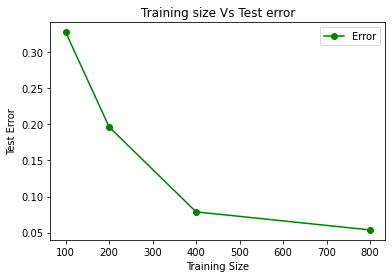

In [6]:
plt.plot(training_sizes, errors, 'go-', label='Error')
plt.xlabel('Training Size')
plt.ylabel('Test Error')
plt.title('Training size Vs Test error')
plt.legend()
plt.show()

* By visualizing the learning curve with different sizes of the training dataset, we can clearly see that 
    
      MATRIX.TRAIN.800 gives the best test error of 0.0537